#  Project: No Show Medical Appointment Investigation 




# Introduction

This is the investigation of a dataset from a Medical Facility in Brazil. The dat centers on appointments made by patients some of who managed to show up for the appoitment and some who did not . The data includes Specific patient identification and well as appointment identification. Records of patients age and any type of illness/sickness they might have is registered. The data also indicates the location of the medical facility , if patients are on a welfare program i.e Scholarhip and if they recieved sms' prior to the appointment . Belwo is a list of all the column names presented in the table :

## Coulmns:

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show


### Questions 

1. Does a patient's age influence them showing up to an appointment ?
2. Is there a relationship between gender and the No shows by patients?
3. Does a Patient receiving an sms prior to the appointment increase the propability of showing up 


In [1]:
#imported packages for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling


In [2]:
#Loading of data.
# This file path was used because the document name alone was producing an error so this was the best option .
df = pd.read_csv(r"C:\Users\sweet\Desktop\project\No_Show_Appt.csv")


In [3]:
#Overview of the dataset for the analysis

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Checking the intergrity of the dataset to see if any column has missing values. There seem to be no missing values here .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Checking for number of rows and columns in the dataset
df.shape

(110527, 14)

In [6]:
#Statistical overview of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Checking for duplicates that may be present 

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [8]:
# This presents the names of all colums in the dataset .
for col_name in df.columns: 
    print(col_name);

PatientId
AppointmentID
Gender
ScheduledDay
AppointmentDay
Age
Neighbourhood
Scholarship
Hipertension
Diabetes
Alcoholism
Handcap
SMS_received
No-show



## Data Cleaning - Eliminating Columns, Renaming Columns, Changing Datatypes

In [9]:
# Dropping columns that will not be needed of for my analysis

df.drop(['PatientId','AppointmentID','ScheduledDay'], axis = 1, inplace=True, errors= 'ignore')

df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Changing of the AppointmentDay datatype whoch was previously an object, renaming No-show to Missed_Appt because its easier to comprehend based on the "no" and "yes" response in the dataset .
Finally Changing Missed_Appt response to Boolean**

In [10]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df.rename(columns={'No-show': 'Missed_Appt'}, inplace=True)

df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Missed_Appt
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df["Missed_Appt"] = df.Missed_Appt.map({"Yes":1, "No":0})

df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Missed_Appt
0,F,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [13]:
#Find the patients with ages less than 1
df[df.Age < 0] 

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Missed_Appt
99832,F,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [15]:
#Drop row with negative age
df = df.drop(labels =99832, axis = 0)

**A Pictorial view of the Data after the cleaning**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 2   Age             110526 non-null  int64              
 3   Neighbourhood   110526 non-null  object             
 4   Scholarship     110526 non-null  int64              
 5   Hipertension    110526 non-null  int64              
 6   Diabetes        110526 non-null  int64              
 7   Alcoholism      110526 non-null  int64              
 8   Handcap         110526 non-null  int64              
 9   SMS_received    110526 non-null  int64              
 10  Missed_Appt     110526 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(8), object(2)
memory usage: 10.1+ MB


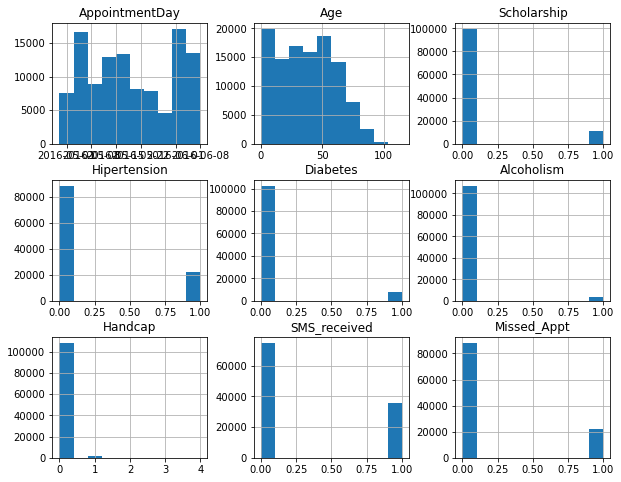

In [16]:
df.info()
df.hist(figsize=(10,8));

## Q.1.Does a patient's age influence them showing up to an appointment ?


In [17]:
Missed = df.Missed_Appt == True
Show = df.Missed_Appt == False

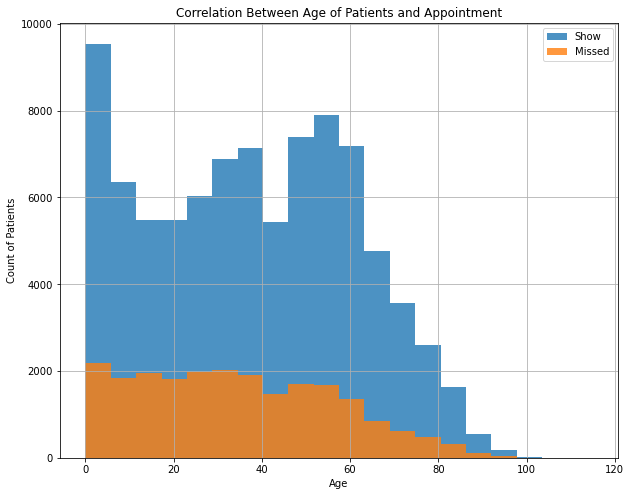

In [18]:
plt.figure(figsize=(10,8))
df.Age[Show].hist(alpha=0.8, bins=20, label='Show')
df.Age[Missed].hist(alpha=0.8, bins=20, label='Missed')
plt.title("Correlation Between Age of Patients and Appointment")
plt.xlabel("Age")
plt.ylabel("Count of Patients")

plt.legend() ;

Can be seen that the more younger and older patients over 30 showed up for their appointments compared to the patients who did not show up for their .This is indicates a relationhip between the young and likelihood of making it to an appointment .

## Q.2. Is there a relationship between gender and Missed Appointments by patients?


In [19]:
df.Gender.value_counts()
df.groupby('Gender').count().Missed_Appt

Gender
F    71839
M    38687
Name: Missed_Appt, dtype: int64

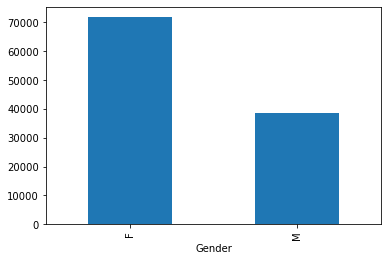

In [20]:
df.groupby('Gender').count().Missed_Appt.plot(kind= 'bar');

A comparison of the Gender show that more women than men make it to their appointments as is expected because the total number of women in the data set is almost double of the men. 

In [21]:
df.groupby('Gender')['Scholarship'].value_counts()

Gender  Scholarship
F       0              62986
        1               8853
M       0              36679
        1               2008
Name: Scholarship, dtype: int64

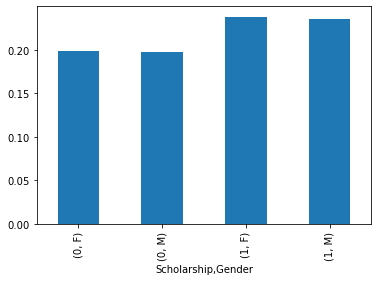

In [22]:
df.groupby(['Scholarship', 'Gender']).Missed_Appt.mean().plot(kind='bar') ;

Another look at the Gender and Scholarships indicates that more females than males tend to show up more for their appointments than the males.This is basically normal because there are more females than males on the welfare program .

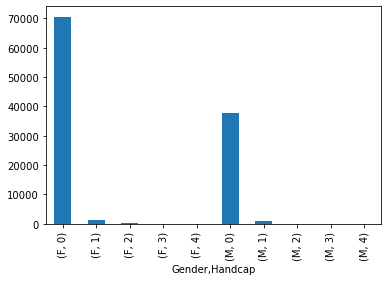

In [23]:
#comparison between patients who received sms' and are handicap
df.groupby(['Gender', 'Handcap']).Missed_Appt.count().plot(kind='bar');

Even seperating the genders by different categories it is visible that there is a strong association generally between female patience than males because evn the few who are handicap are more than the men .

## Q.3. Does a Patient receiving an sms prior to the appointment increase the possibility of showing up ?

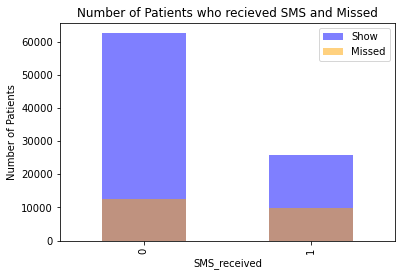

In [24]:
df.SMS_received[Show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='Show')
df.SMS_received[Missed].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Missed')
plt.title("Number of Patients who recieved SMS and Missed")
plt.xlabel("SMS_received")
plt.ylabel("Number of Patients")
plt.legend() ;

The number of patients who did not receive an sms and still showed up for their appointments far out weights the number who received sms' and show up .There seems to be no association in this scenario as patients who were not sent sms reminders still managed to mak eit to their appointments.


## Conclusions



To sum it all up, This was a good and easy to understand dataset. According to my analysis it can be seen that a couple of factors attributed to more patients showing up to their appointment than others .The factors include the ages of the patients, their gender, the welfare progrmas they have as well as sms notifications before their appointments . However the reasona are not limited to just these, ther couldbe other factors involved .

However, one issue for me is the sample size of the gender. It seems there are more femail patients than males which to me did not make it an objective dataset because more of teh outcome was geared towards the females. There couldbe a reason why there were more females but this was my observation .